Optimization terminated successfully.
         Current function value: 0.456327
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       cardiac_abnormal   No. Observations:                   15
Model:                          Logit   Df Residuals:                       11
Method:                           MLE   Df Model:                            3
Date:                Fri, 25 Jul 2025   Pseudo R-squ.:                  0.3220
Time:                        18:12:30   Log-Likelihood:                -6.8449
converged:                       True   LL-Null:                       -10.095
Covariance Type:            nonrobust   LLR p-value:                   0.08964
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4748      0.679      0.699      0.485      -0.857       1.806
BFS           -1.4955      0.

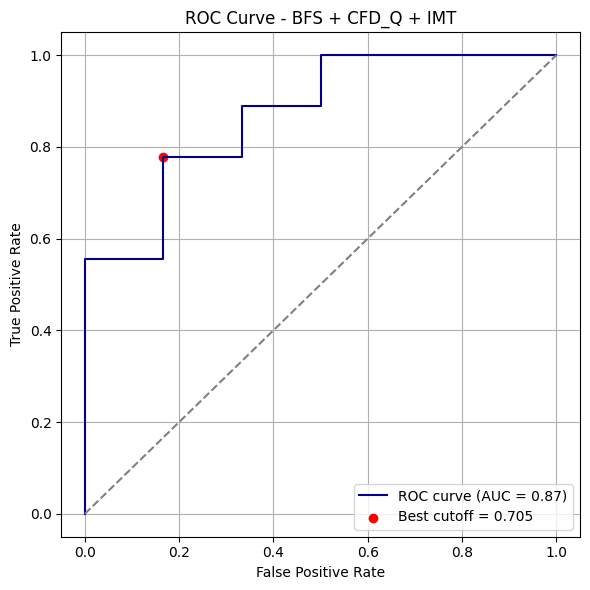

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# === 创建输出目录结构 ===
os.makedirs("./Figure", exist_ok=True)

# === 步骤 0：加载数据 ===
# 1. 数据加载
df = pd.DataFrame({
    'Case': [1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9,10,10,10,11,11,11],
    'GA': [24.71,24.71,24.71,24.14,24.14,24.14,24.00,24.00,24.00,25.43,25.43,25.43,
           26.14,26.14,26.14,28.00,28.00,28.00,26.43,26.43,26.43,35.29,35.29,35.29,
           24.57,24.57,24.57,33.00,33.00,33.00,26.71,26.71,26.71],
    'plane': ['PA','DA','AO']*11,
    'BFS': [17.226,17.221,17.320,17.552,17.144,17.288,17.249,17.173,17.376,17.287,17.283,17.040,
            17.393,17.195,17.555,17.379,17.530,17.575,17.495,17.225,17.569,17.639,17.320,17.373,
            17.443,17.350,17.218,17.716,17.571,17.644,np.nan,np.nan,np.nan],
    'IMT': [356.30,564.05,525.90,267.70,633.15,281.60,369.90,383.00,420.10,377.70,775.30,493.20,
            471.20,798.45,586.50,450.10,457.55,488.10,571.80,712.55,793.80,490.00,480.00,400.00,
            543.00,453.55,394.50,380.00,400.70,330.00,np.nan,np.nan,np.nan],
    'Echo_Diameter': [4.30,2.00,3.70,5.40,3.50,2.45,np.nan,np.nan,np.nan,6.10,2.30,2.40,
                      np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,
                      5.20,3.00,3.90,7.10,4.30,3.40,5.20,3.50,4.10],
    'ECHO_velocity': [57.00,63.00,63.00,57.00,75.00,56.00,np.nan,np.nan,np.nan,53.60,46.00,56.00,
                      np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,
                      87.00,71.00,93.97,103.00,139.00,130.00,64.00,87.00,87.50],
    'CFD_Pressure': [-0.10,-1.41,0.16,-0.62,-1.23,-1.94,np.nan,np.nan,np.nan,-0.10,-0.43,2.56,
                     np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,
                     -0.17,-1.70,2.28,-1.52,-6.57,0.91,-0.38,-2.97,-0.72],
    'CFD_WSS': [8.28,159.86,45.53,82.34,98.03,130.24,np.nan,np.nan,np.nan,9.72,67.29,165.79,
                np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,
                19.91,176.49,110.83,171.40,539.85,111.55,39.22,191.19,186.88],
    'CFD_Q': [1.33,1.33,6.28,7.41,7.41,7.41,np.nan,np.nan,np.nan,1.62,1.62,-1.15,
              np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,
              2.62,2.62,7.81,14.47,14.47,5.90,2.64,2.64,5.17],
    'CFD_Velocity': [14.30,56.45,45.67,47.77,62.33,72.11,np.nan,np.nan,np.nan,14.53,29.15,83.05,
                     np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,
                     22.15,64.20,56.61,93.95,142.08,63.90,31.09,82.39,74.08],
    'cardiac_abnormal': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0]
})



# 提取变量
X = df[["BFS", "CFD_Q", "IMT"]]
y = df["cardiac_abnormal"]

# 合并并去除缺失值
data_all = pd.concat([X, y], axis=1)
data_clean = data_all.dropna()

# 重设索引以确保对齐
X_clean = data_clean[["BFS", "CFD_Q", "IMT"]].reset_index(drop=True)
y_clean = data_clean["cardiac_abnormal"].reset_index(drop=True)

# 标准化
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_clean), columns=X_clean.columns)

# 添加常数项
X_const = sm.add_constant(X_scaled)

# === 2. 拟合Logistic回归模型 ===
logit_model = sm.Logit(y_clean, X_const).fit()
print(logit_model.summary())

# === 3. 计算预测概率和ROC曲线 ===
y_proba = logit_model.predict(X_const)
fpr, tpr, thresholds = roc_curve(y_clean, y_proba)
roc_auc = auc(fpr, tpr)

# === 4. 找出最佳cutoff点 ===
youden_index = tpr - fpr
best_threshold = thresholds[np.argmax(youden_index)]

print(f"\nAUC = {roc_auc:.3f}")
print(f"最佳cutoff阈值 = {best_threshold:.3f}")

# === 5. 绘制ROC曲线并保存 ===
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkblue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.scatter(fpr[np.argmax(youden_index)], tpr[np.argmax(youden_index)],
            color='red', label=f'Best cutoff = {best_threshold:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - BFS + CFD_Q + IMT')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()

# 保存ROC曲线图片
roc_save_path = "./Figure/ROC Curve-BFS+CFD_Q+IMT.png"
plt.savefig(roc_save_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()  # 关闭图形
